In [6]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import 

In [126]:
#params
cropSize=128
#range for perturbing the corners to get the homographies [-rho,+rho]
rho=16
#resize shape
resize=(320,240)

In [102]:
#load image
image=cv2.imread("/home/kartikmadhira/datasets/ms-coco/train2014/COCO_train2014_000000000092.jpg")
image=cv2.resize(image,resize)


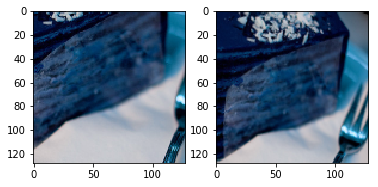

In [135]:
#get a random x and y location that does not have the borders
#x is Y and y is X!
getLocX=random.randint(105,215)
getLocY=random.randint(105,135)
#crop the image
patchA=image[getLocY-64:getLocY+64,getLocX-64:getLocX+64]

#perturb image randomly and apply homography
pts1=np.float32([[getLocY-64+random.randint(-rho,rho),getLocX-64+random.randint(-rho,rho)],
      [getLocY+64+random.randint(-rho,rho),getLocX-64+random.randint(-rho,rho)],
      [getLocY-64+random.randint(-rho,rho),getLocX+64+random.randint(-rho,rho)],
      [getLocY+64+random.randint(-rho,rho),getLocX+64+random.randint(-rho,rho)]])
pts2=np.float32([[getLocY-64,getLocX-64],
      [getLocY+64,getLocX-64],
      [getLocY-64,getLocX+64],
      [getLocY+64,getLocX+64]])

#get the perspective transform
hAB=cv2.getPerspectiveTransform(pts2,pts1)

#get the inverses
hBA=np.linalg.inv(hAB)

warped=cv2.warpPerspective(image,hBA,(320,240))

patchB=warped[getLocY-64:getLocY+64,getLocX-64:getLocX+64]

#homogrpahy check
#orig=cv2.warpPerspective(warped,hBA,(320,240))
plt.subplot(1,2,1)
plt.imshow(patchA)
plt.subplot(1,2,2)
plt.imshow(patchB)